In [109]:
import numpy as np
import pandas as pd
import random
import joblib as jl
import seaborn as sns
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor,RandomForestRegressor
from sklearn.feature_selection import f_regression,SelectKBest,VarianceThreshold
from sklearn.ensemble import GradientBoostingRegressor
# feature infomation
# plot correlation matrix->Choose 1 most important feature -> Simple Linear(Model Scratch,model sklearn)->model base->feature selection
# adjust params(gridsearch,default)
# K-folds, metrics

# Ưu điểm :
### -Dễ dàng thực hiện (Dễ tính toán đạo hàm, cập nhật tham số, đưa ra output của mô hình)
### -Có hiệu suất tốt trên bộ dữ liệu dần tuyến tính
### -Khả năng bị over-fitting thấp 
# Nhược điểm :
### -Nhạy cảm với bộ dữ liệu có nhiều out-lier
### -Hiệu năng k tốt trên bộ dữ liệu phức tạp

In [110]:
class Linear_Regression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

(20, 1)
(20,)
Weights and bias: [1.08850079] 4.188709546086312


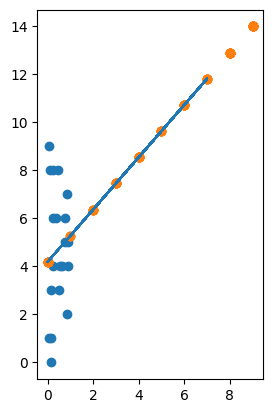

In [111]:
X_train=np.random.rand(20,1)
print(X_train.shape)
y_train=np.random.randint(low=10,size=20)
print(y_train.shape)
ax1=plt.subplot(1,2,1)
plt.scatter(X_train,y_train)
# Linear Regression scratch
model_scratch = Linear_Regression()
model_scratch.fit(X_train, y_train)
w=model_scratch.weights
bias=model_scratch.bias
print("Weights and bias:",w,bias)
x=np.random.randint(low=8,size=100)
x=np.array([x])
y=np.dot(x.T,w)+bias
plt.plot(x.squeeze(),y)
X_test = np.random.randint(low=10,size=(100,1))
predictions = model_scratch.predict(X_test)
plt.scatter(x=X_test,y=predictions)

Weights and bias: [0.4138237] 4.514976345162828


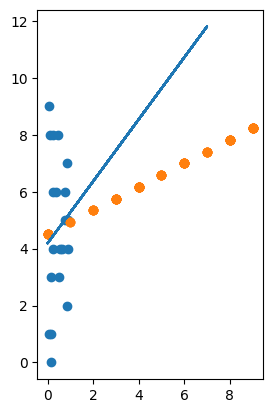

In [112]:
ax2=plt.subplot(1,2,2)
plt.scatter(X_train,y_train)
model_sklearn=LinearRegression()
model_sklearn.fit(X_train,y_train)
y=np.dot(x.T,w)+bias
plt.plot(x.squeeze(),y)
w = model_sklearn.coef_
bias = model_sklearn.intercept_
print("Weights and bias:",w,bias)
predictions=model_sklearn.predict(X_test)
plt.scatter(X_test,predictions)

In [113]:
random_state=42
def evaluate(df,model,i):
    index_col_SP=df.columns.get_loc("SalePrice")
    if index_col_SP==df.shape[1]-1:
        X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],random_state=random_state,test_size=0.3)
    else:
        X=pd.concat([df.iloc[:,:index_col_SP],df.iloc[:,index_col_SP+1:]],axis=1)
        y=df.iloc[:,index_col_SP]
        X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=random_state,test_size=0.3)
    model.fit(X_train,y_train)
    jl.dump(model,r"C:\Users\NTCUONG\notebook\model\model{}.pkl".format(i))
    y_pre=model.predict(X_test)
    MAE=mean_absolute_error(y_test,y_pre)
    RMSE=root_mean_squared_error(y_test,y_pre)
    return MAE,RMSE


In [114]:
stt_training=pd.read_csv("statistic_training_dataset.csv")
stt_training

,DATASET,ENCODER,IMPUTER,NORMALIZER
0,training1.csv,LabelEncoder,simpleimputer,none
1,training2.csv,LabelEncoder,simpleimputer,normalizer
2,training3.csv,LabelEncoder,simpleimputer,minmaxscaler
3,training4.csv,LabelEncoder,knnimputer,none
4,training5.csv,LabelEncoder,knnimputer,normalizer
5,training6.csv,LabelEncoder,knnimputer,minmaxscaler
6,training7.csv,OnehotEncoder,simpleimputer,none
7,training8.csv,OnehotEncoder,simpleimputer,normalizer
8,training9.csv,OnehotEncoder,simpleimputer,minmaxscaler
9,training10.csv,OnehotEncoder,knnimputer,none


In [115]:
metrics={"MAE":[],"RMSE":[]}
for i in range(12):
    model=LinearRegression()
    df=pd.read_csv("training{}.csv".format(i+1))
    MAE,RMSE=evaluate(df,model,i+1)
    metrics["MAE"].append(MAE)
    metrics["RMSE"].append(RMSE)
metrics_df=pd.DataFrame(metrics)
metrics_df

,MAE,RMSE
0,2.191375e+04,3.304478e+04
1,2.753017e+04,4.279183e+04
2,2.770456e+04,4.309108e+04
3,2.770456e+04,4.309108e+04
4,2.140280e+04,3.348576e+04
5,2.130656e+04,3.336080e+04
6,1.818457e+04,2.796944e+04
7,2.724896e+04,4.463016e+04
8,8.500275e+12,8.346025e+13
9,8.500275e+12,8.346025e+13


In [116]:
stt_eval_model=pd.concat([stt_training,metrics_df],axis=1)
stt_eval_model

,DATASET,ENCODER,IMPUTER,NORMALIZER,MAE,RMSE
0,training1.csv,LabelEncoder,simpleimputer,none,2.191375e+04,3.304478e+04
1,training2.csv,LabelEncoder,simpleimputer,normalizer,2.753017e+04,4.279183e+04
2,training3.csv,LabelEncoder,simpleimputer,minmaxscaler,2.770456e+04,4.309108e+04
3,training4.csv,LabelEncoder,knnimputer,none,2.770456e+04,4.309108e+04
4,training5.csv,LabelEncoder,knnimputer,normalizer,2.140280e+04,3.348576e+04
5,training6.csv,LabelEncoder,knnimputer,minmaxscaler,2.130656e+04,3.336080e+04
6,training7.csv,OnehotEncoder,simpleimputer,none,1.818457e+04,2.796944e+04
7,training8.csv,OnehotEncoder,simpleimputer,normalizer,2.724896e+04,4.463016e+04
8,training9.csv,OnehotEncoder,simpleimputer,minmaxscaler,8.500275e+12,8.346025e+13
9,training10.csv,OnehotEncoder,knnimputer,none,8.500275e+12,8.346025e+13


In [117]:
stt_eval_model.sort_values("MAE",ascending=True)

,DATASET,ENCODER,IMPUTER,NORMALIZER,MAE,RMSE
6,training7.csv,OnehotEncoder,simpleimputer,none,1.818457e+04,2.796944e+04
5,training6.csv,LabelEncoder,knnimputer,minmaxscaler,2.130656e+04,3.336080e+04
4,training5.csv,LabelEncoder,knnimputer,normalizer,2.140280e+04,3.348576e+04
0,training1.csv,LabelEncoder,simpleimputer,none,2.191375e+04,3.304478e+04
7,training8.csv,OnehotEncoder,simpleimputer,normalizer,2.724896e+04,4.463016e+04
1,training2.csv,LabelEncoder,simpleimputer,normalizer,2.753017e+04,4.279183e+04
2,training3.csv,LabelEncoder,simpleimputer,minmaxscaler,2.770456e+04,4.309108e+04
3,training4.csv,LabelEncoder,knnimputer,none,2.770456e+04,4.309108e+04
8,training9.csv,OnehotEncoder,simpleimputer,minmaxscaler,8.500275e+12,8.346025e+13
9,training10.csv,OnehotEncoder,knnimputer,none,8.500275e+12,8.346025e+13


In [118]:
stt_eval_model.sort_values("RMSE",ascending=True)

,DATASET,ENCODER,IMPUTER,NORMALIZER,MAE,RMSE
6,training7.csv,OnehotEncoder,simpleimputer,none,1.818457e+04,2.796944e+04
0,training1.csv,LabelEncoder,simpleimputer,none,2.191375e+04,3.304478e+04
5,training6.csv,LabelEncoder,knnimputer,minmaxscaler,2.130656e+04,3.336080e+04
4,training5.csv,LabelEncoder,knnimputer,normalizer,2.140280e+04,3.348576e+04
1,training2.csv,LabelEncoder,simpleimputer,normalizer,2.753017e+04,4.279183e+04
2,training3.csv,LabelEncoder,simpleimputer,minmaxscaler,2.770456e+04,4.309108e+04
3,training4.csv,LabelEncoder,knnimputer,none,2.770456e+04,4.309108e+04
7,training8.csv,OnehotEncoder,simpleimputer,normalizer,2.724896e+04,4.463016e+04
8,training9.csv,OnehotEncoder,simpleimputer,minmaxscaler,8.500275e+12,8.346025e+13
9,training10.csv,OnehotEncoder,knnimputer,none,8.500275e+12,8.346025e+13


In [119]:
training7=pd.read_csv("training7.csv")
# training7=training7.iloc[:-1,:]
training7


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,0,0,0,0,0,1,0,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,0,0,0,0,0,1,0,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,0,0,0,0,0,1,0,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1,0,1,0,0,0,0,0,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,0,0,0,0,0,1,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,1,0,0,0,0,0,1,0,0,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,1,0,0,0,0,0,1,0,0,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,1,0,0,0,0,0,1,0,0,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,1,0,0,0,0,0,1,0,0,142125


In [120]:
best_model=jl.load(r"C:\Users\NTCUONG\notebook\model\model7.pkl")

In [121]:
test_set=pd.read_csv(r"C:\Users\NTCUONG\notebook\house_testing.csv")
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [122]:
test_set=test_set.drop(columns=["Id","Alley","MasVnrType","FireplaceQu","PoolQC","Fence","MiscFeature"])
test_set["Ageofhouse"]=test_set["YrSold"]-test_set["YearBuilt"]
# test_set=pd.concat([test_set.iloc[:,:-2],test_set["Ageofhouse"]],axis=1)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [123]:
columns_with_nan = test_set.columns[(test_set.dtypes != 'object') & test_set.isna().any()]
columns_with_nan

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

columns_contain_nan=[]
for column in test_set.columns:
    if test_set[column].isna().sum()!=0:
        columns_contain_nan.append([column,(test_set[column].dtype)])
(columns_contain_nan)

name_columns_contain_nan=[column[0] for column in columns_contain_nan]
len(name_columns_contain_nan)

c=test_set.select_dtypes(include=['object'])
c.columns.size

for column in c.columns:
    enc=jl.load(r"C:\Users\NTCUONG\notebook\label_enc\{}.pkl".format(column))
    test_set[column]=enc.fit_transform(test_set[column])
test_set

train=pd.read_csv("data_label_enc.csv")
train

columns_float=test_set.select_dtypes(include=['float'])
columns_float_contain_nan=[]
for col in columns_float.columns:
    if columns_float[col].isna().sum()!=0:
        columns_float_contain_nan.append(col)
len(columns_float_contain_nan)

ipt=SimpleImputer()
for col in columns_float_contain_nan:
    ipt.fit(train[col].to_numpy().reshape(-1,1))
    test_set[col]=ipt.transform(test_set[col].to_numpy().reshape(-1,1))
test_set.info()

test_set=best_norm.transform(test_set)
test_set

best_model.predict(test_set)

In [124]:
test_set=pd.get_dummies(test_set,dtype=int)

In [125]:
number_col=test_set.select_dtypes(include=['int64','float64']).columns
c=[]
for col in number_col:
    if test_set[col].isna().any():
        c.append(col)
c

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [126]:
needed_df=pd.read_csv("data_process_ipt.csv")
needed_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [127]:
s=SimpleImputer()
for col in c:
    s.fit(needed_df[col].to_numpy().reshape(-1,1))
    test_set[col]=s.transform(test_set[col].to_numpy().reshape(-1,1))
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 251 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int32(214), int64(26)
memory usage: 1.6 MB


In [128]:
columns_with_nan = test_set.columns[(test_set.dtypes != 'object') & test_set.isna().any()]
columns_with_nan

Index([], dtype='object')

In [129]:
test_set

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [130]:
training7

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,0,0,0,0,0,1,0,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,0,0,0,0,0,1,0,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,0,0,0,0,0,1,0,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1,0,1,0,0,0,0,0,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,0,0,0,0,0,1,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,1,0,0,0,0,0,1,0,0,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,1,0,0,0,0,0,1,0,0,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,1,0,0,0,0,0,1,0,0,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,1,0,0,0,0,0,1,0,0,142125


In [131]:
test_columns,train_columns=[],[]
for column in test_set.columns:
    test_columns.append(column)
for column in training7.columns:
    train_columns.append(column)
print(list(set(train_columns)-set(test_columns)))

['PavedDrive_nan', 'RoofStyle_nan', 'GarageFinish_nan', 'Condition2_RRAe', 'Condition2_nan', 'BsmtCond_nan', 'GarageQual_nan', 'LandContour_nan', 'LotConfig_nan', 'SaleCondition_nan', 'RoofMatl_ClyTile', 'Condition2_RRNn', 'Exterior1st_Stone', 'ExterCond_nan', 'RoofMatl_Metal', 'Exterior1st_ImStucc', 'CentralAir_nan', 'RoofMatl_nan', 'MSZoning_nan', 'Exterior1st_nan', 'Exterior2nd_nan', 'HeatingQC_nan', 'Electrical_nan', 'Foundation_nan', 'LotShape_nan', 'Condition1_nan', 'Functional_nan', 'Utilities_NoSeWa', 'Condition2_RRAn', 'BsmtQual_nan', 'Electrical_Mix', 'Street_nan', 'LandSlope_nan', 'BldgType_nan', 'KitchenQual_nan', 'Heating_Floor', 'HouseStyle_nan', 'GarageType_nan', 'Heating_nan', 'Heating_OthW', 'BsmtFinType1_nan', 'RoofMatl_Membran', 'Neighborhood_nan', 'BsmtFinType2_nan', 'Utilities_nan', 'GarageQual_Ex', 'RoofMatl_Roll', 'Exterior2nd_Other', 'SalePrice', 'SaleType_nan', 'HouseStyle_2.5Fin', 'BsmtExposure_nan', 'ExterQual_nan', 'GarageCond_nan']


In [132]:
training=training7.copy()
training=training.iloc[:-1,:-1]

In [133]:
training[:]=0
training


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1455,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
training.update(test_set)
training

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15476\2970687935.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 468.  923.  791. ... 1224.  337.  758.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  training.update(test_set)
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15476\2970687935.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[144.   0.   0. ...   0.   0.   0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  training.update(test_set)
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15476\2970687935.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[270. 406. 137. ...   0. 575. 238.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tra

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,1,0,0,0,0,0,1,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,1,0,0,0,0,0,1,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,1,0,1,0,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,1,0,1,0,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,1,0,0,0,0,0,1,0,0


In [135]:
training.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0
mean,57.378341,68.809007,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.739739,439.206744,52.615181,...,0.002742,0.862234,0.0,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248,0.0
std,42.746880,20.568131,4955.517327,1.436812,1.113740,30.390071,21.130467,176.710080,455.111902,176.693372,...,0.052306,0.344772,0.0,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837,0.0
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,50.000000,70.049958,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,351.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [136]:
test_set.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.809007,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.739739,439.206744,52.615181,...,0.002056,0.080192,0.002742,0.862234,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,42.746880,20.568131,4955.517327,1.436812,1.113740,30.390071,21.130467,176.710080,455.111902,176.693372,...,0.045314,0.271683,0.052306,0.344772,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,70.049958,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,351.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
model.predict(training)

array([-2.24198465e+19, -3.00229267e+19, -1.59107710e+19, ...,
       -2.90835811e+19, -1.91177252e+19, -1.47162674e+19])

In [138]:
#1461-2919
id=[]
for i in range(1461,2920):
    id.append(i)
    
id=np.array([id])
id=id.reshape(-1,1)
print(id.shape)
y=np.array([best_model.predict(training)])
y=y.reshape(-1,1)
print(y.shape)
data=np.concatenate((id,y),axis=1)
print(data.shape)
df=pd.DataFrame(data,columns=["Id","SalePrice"])
df

(1459, 1)
(1459, 1)
(1459, 2)


,Id,SalePrice
0,1461.0,116205.402573
1,1462.0,125545.565531
2,1463.0,185759.471799
3,1464.0,197860.901411
4,1465.0,214291.166517
...,...,...
1454,2915.0,57912.675369
1455,2916.0,80382.514629
1456,2917.0,176639.570570
1457,2918.0,92951.369989


In [139]:
df["Id"]=df["Id"].astype("int")
df

,Id,SalePrice
0,1461,116205.402573
1,1462,125545.565531
2,1463,185759.471799
3,1464,197860.901411
4,1465,214291.166517
...,...,...
1454,2915,57912.675369
1455,2916,80382.514629
1456,2917,176639.570570
1457,2918,92951.369989


In [140]:
# df.to_csv("submission_house.csv",index=False)

In [141]:
house=pd.read_csv(r"C:\Users\NTCUONG\notebook\house_training.csv")
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [142]:
house["OverallQual"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: OverallQual
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [143]:
X=house["OverallQual"]
y=house["SalePrice"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=random_state,test_size=0.2)
model_sklearn.fit(X_train.to_numpy().reshape(-1,1),y_train.to_numpy().reshape(-1,1))
y_pre=model_sklearn.predict(X_test.to_numpy().reshape(-1,1))
print(mean_absolute_error(y_test,y_pre))
print(root_mean_squared_error(y_test,y_pre))
print(r2_score(y_test,y_pre))

33343.24208697129
51778.62651238531
0.6504677778896863


In [144]:

model_scratch.fit(X_train.to_numpy().reshape(-1,1),y_train.to_numpy().reshape(1168,))
y=model_scratch.predict(test_set["OverallQual"].to_numpy().reshape(-1,1))
y

array([144852.9767426 , 179941.63875562, 144852.9767426 , ...,
       144852.9767426 , 144852.9767426 , 215030.30076863])

In [145]:
id=[]
for i in range(1461,2920):
    id.append(i)
    
id=np.array([id])
id=id.reshape(-1,1)
print(id.shape)
y=np.array([y])
y=y.reshape(-1,1)
print(y.shape)
data=np.concatenate((id,y),axis=1)
print(data.shape)
df=pd.DataFrame(data,columns=["Id","SalePrice"])
df["SalePrice"]=round(df["SalePrice"]).astype("int")
df["Id"]=df["Id"].astype("int")
df

(1459, 1)
(1459, 1)
(1459, 2)


,Id,SalePrice
0,1461,144853
1,1462,179942
2,1463,144853
3,1464,179942
4,1465,250119
...,...,...
1454,2915,109764
1455,2916,109764
1456,2917,144853
1457,2918,144853


In [146]:
df.to_csv("submission_house2.csv",index=False)

In [147]:
y=model_sklearn.predict(test_set["OverallQual"].to_numpy().reshape(-1,1))
id=[]
for i in range(1461,2920):
    id.append(i)
    
id=np.array([id])
id=id.reshape(-1,1)
print(id.shape)
y=np.array([y])
y=y.reshape(-1,1)
print(y.shape)
data=np.concatenate((id,y),axis=1)
print(data.shape)
df=pd.DataFrame(data,columns=["Id","SalePrice"])
df["SalePrice"]=round(df["SalePrice"]).astype("int")
df["Id"]=df["Id"].astype("int")
df

(1459, 1)
(1459, 1)
(1459, 2)


,Id,SalePrice
0,1461,131666
1,1462,176046
2,1463,131666
3,1464,176046
4,1465,264806
...,...,...
1454,2915,87286
1455,2916,87286
1456,2917,131666
1457,2918,131666


In [148]:
df.to_csv("submission_house3.csv",index=False)

In [149]:
training7=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training7.csv")
training7

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,1,0,0,0,0,0,1,0,0,145000
1,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,1,0,0,0,0,0,1,0,0,178000
2,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,1,0,0,0,0,0,1,0,0,85000
3,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,1,0,0,0,0,0,1,0,0,175000
4,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,1,0,0,0,0,0,1,0,0,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,30,50.0,5925,4,7,1937,2000,435.0,168,0,...,1,0,0,0,1,0,0,0,0,89471
1456,20,124.0,16158,7,5,2005,2005,16.0,1274,0,...,1,0,0,0,0,0,1,0,0,260000
1457,60,63.0,8199,7,5,2005,2005,0.0,648,0,...,1,0,0,0,0,0,1,0,0,189000
1458,70,60.0,9084,4,5,1940,1950,0.0,0,0,...,1,0,0,0,0,0,1,0,0,108000


In [150]:
def create_df(col_list):
    df_fs=training7["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([training7[col],df_fs],axis=1)
    return df_fs

In [151]:
model_sklearn=DecisionTreeRegressor(max_depth=20)
split_row=1168
def eval(df_fs):
    X_train,X_test,y_train,y_test=df_fs.iloc[:split_row,:-1], df_fs.iloc[split_row:,:-1], df_fs.iloc[:split_row,-1], df_fs.iloc[split_row:,-1]
    model_sklearn.fit(X_train,y_train)
    y_pre=model_sklearn.predict(X_test)
    jl.dump(model_sklearn,r"C:\Users\NTCUONG\notebook\model\model_fs")
    mae=mean_absolute_error(y_test,y_pre)
    rmse=root_mean_squared_error(y_test,y_pre)
    r2=r2_score(y_test,y_pre)
    print("MAE :",mae)
    print("RMSE :",rmse)
    print("R2 : ",r2)
    # k.append(i)
    # mae.append(mean_absolute_error(y_test,y_pre))
    # rmse.append(root_mean_squared_error(y_test,y_pre))
    # r2.append(r2_score(y_test,y_pre))

In [152]:
training7

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,1,0,0,0,0,0,1,0,0,145000
1,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,1,0,0,0,0,0,1,0,0,178000
2,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,1,0,0,0,0,0,1,0,0,85000
3,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,1,0,0,0,0,0,1,0,0,175000
4,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,1,0,0,0,0,0,1,0,0,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,30,50.0,5925,4,7,1937,2000,435.0,168,0,...,1,0,0,0,1,0,0,0,0,89471
1456,20,124.0,16158,7,5,2005,2005,16.0,1274,0,...,1,0,0,0,0,0,1,0,0,260000
1457,60,63.0,8199,7,5,2005,2005,0.0,648,0,...,1,0,0,0,0,0,1,0,0,189000
1458,70,60.0,9084,4,5,1940,1950,0.0,0,0,...,1,0,0,0,0,0,1,0,0,108000


In [153]:
fs=VarianceThreshold(threshold=0.000020)

In [154]:
fs.fit(training7.iloc[:,:-1],training7.iloc[:,-1])
c=fs.get_feature_names_out()
df_fs=create_df(c)
eval(df_fs)

MAE : 26765.69634703196
RMSE : 40851.39820118313
R2 :  0.78242949648896


In [155]:
training7[:]=0
training7

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
training7.update(test_set)
training7

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15476\1707550949.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[468. 923. 791. ... 337. 758.   0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  training7.update(test_set)
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15476\1707550949.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[144.   0.   0. ...   0.   0.   0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  training7.update(test_set)
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15476\1707550949.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[270. 406. 137. ... 575. 238.   0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  trainin

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,1,0,0,0,0,0,1,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,1,0,0,0,0,0,1,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,1,0,0,0,0,0,1,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,1,0,1,0,0,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,1,0,1,0,0,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,1,0,0,0,0,0,1,0,0,0
1458,60,74.0,9627,7,5,1993,1994,94.0,758.0,0.0,...,1,0,0,0,0,0,1,0,0,0


In [157]:
testing_fs=create_df(c)
testing_fs

,SaleCondition_Partial,SaleCondition_Normal,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand,SaleCondition_Abnorml,SaleType_WD,SaleType_Oth,SaleType_New,SaleType_ConLw,...,BsmtFinSF1,MasVnrArea,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,LotFrontage,MSSubClass,SalePrice
0,0,1,0,0,0,0,1,0,0,0,...,468.0,0.0,1961,1961,6,5,11622,80.0,20,0
1,0,1,0,0,0,0,1,0,0,0,...,923.0,108.0,1958,1958,6,6,14267,81.0,20,0
2,0,1,0,0,0,0,1,0,0,0,...,791.0,0.0,1998,1997,5,5,13830,74.0,60,0
3,0,1,0,0,0,0,1,0,0,0,...,602.0,20.0,1998,1998,6,6,9978,78.0,60,0
4,0,1,0,0,0,0,1,0,0,0,...,263.0,0.0,1992,1992,5,8,5005,43.0,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,1,0,0,0,...,252.0,0.0,1970,1970,5,4,1894,21.0,160,0
1456,0,0,0,0,0,1,1,0,0,0,...,1224.0,0.0,1996,1960,7,5,20000,160.0,20,0
1457,0,1,0,0,0,0,1,0,0,0,...,337.0,0.0,1992,1992,5,5,10441,62.0,85,0
1458,0,1,0,0,0,0,1,0,0,0,...,758.0,94.0,1994,1993,5,7,9627,74.0,60,0


In [158]:
model_fl=jl.load(r"C:\Users\NTCUONG\notebook\model\model_fs")
prediction=model_sklearn.predict(testing_fs.iloc[:-1,:-1])
prediction

array([144000., 143000., 150000., ..., 165000., 115000., 189000.])

In [159]:

y=model_sklearn.predict(testing_fs.iloc[:-1,:-1])
id=[]
for i in range(1461,2920):
    id.append(i)
    
id=np.array([id])
id=id.reshape(-1,1)
print(id.shape)
y=np.array([y])
y=y.reshape(-1,1)
print(y.shape)
data=np.concatenate((id,y),axis=1)
print(data.shape)
df=pd.DataFrame(data,columns=["Id","SalePrice"])
# df["SalePrice"]=(df["SalePrice"])
df["Id"]=df["Id"].astype("int")
df

(1459, 1)
(1459, 1)
(1459, 2)


,Id,SalePrice
0,1461,144000.0
1,1462,143000.0
2,1463,150000.0
3,1464,183200.0
4,1465,202500.0
...,...,...
1454,2915,97000.0
1455,2916,80000.0
1456,2917,165000.0
1457,2918,115000.0


In [160]:
df.to_csv("submission_house4.csv",index=False)